<a href="https://colab.research.google.com/github/musab-r/React-Native-Hijri-Calendar/blob/master/CIFAR10/1_2_4_students_FF_Gan_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# %tensorflow_version 1.x
# !pip install --upgrade opencv-python==3.4.2.17
import numpy as np
import tensorflow as tf
import tensorflow.keras
import tensorflow.keras.backend as K
# import os
from tensorflow.keras.datasets import fashion_mnist,mnist,cifar10
# import keras.backend as K
from tensorflow.keras.layers import Conv2D,Activation,BatchNormalization,UpSampling2D,Embedding,ZeroPadding2D, Input, Flatten, Dense, Reshape, LeakyReLU, Dropout,MaxPooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras import regularizers

from tensorflow.keras.utils import Progbar
from keras.initializers import RandomNormal
import random
from sklearn.model_selection import train_test_split
# from keras.utils import np_utils
from tensorflow.keras import utils as np_utils



In [ ]:
nb_classes = 10
batch_size = 128
maxepoches = 250
learning_rate = 0.1
lr_decay = 1e-6
lr_drop = 20
def lr_scheduler(epoch):
    return learning_rate * (0.5 ** (epoch // lr_drop))
reduce_lr = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

In [ ]:
#Loading and splitting the dataset into train, validation and test


(X_Train, y_Train), (X_test, y_test) = cifar10.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_Train, y_Train, test_size=0.20)
# convert y_train and y_test to categorical binary values 
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_val = np_utils.to_categorical(y_val, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

In [ ]:
X_Train.shape

(50000, 32, 32, 3)

In [ ]:
# Reshape them to batch_size, width,height,#channels
X_train = X_train.reshape(40000, 32, 32, 3)
X_val = X_val.reshape(10000, 32, 32, 3)
X_test = X_test.reshape(10000, 32, 32, 3)

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

# Normalize the values
X_train /= 255
X_val /= 255
X_test /= 255

In [ ]:
init=RandomNormal(mean=0,stddev=0.02)
input_shape = (32, 32, 3) # Input shape of each image
weight_decay = 0.0005
def build_model():
    # Build the network of vgg for 10 classes with massive dropout and weight decay as described in the paper.

    model = Sequential()

    model.add(Conv2D(64, (3, 3), padding='same',
                     input_shape=input_shape,kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

    model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

    model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

    model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

    model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(256,kernel_regularizer=regularizers.l2(weight_decay), name='dense_1'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    model.add(Dropout(0.5))
    model.add(Dense(10, name='dense_2'))
    model.add(Activation('softmax'))
    return model
teacher = build_model()

sgd = SGD(lr=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)

teacher.compile(loss='categorical_crossentropy',optimizer=sgd, metrics=['accuracy'])


In [ ]:
teacher.fit(X_train,Y_train,batch_size=128,epochs=150,verbose=1,callbacks=[reduce_lr],validation_data=(X_val,Y_val))

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

path = F"/content/gdrive/MyDrive/Cifar10/teacher_cifar10.h5" 
teacher.load_weights(path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
Y_test = np_utils.to_categorical(y_test, nb_classes)
loss, acc =teacher.evaluate(X_test, y_test, verbose=1)
loss, acc

313/313 [==============================] - 36s 11ms/step - loss: 0.8109 - accuracy: 0.9023


(0.8068325519561768, 0.901199996471405)

In [ ]:
#Collect the dense vector from the previous layer output and store it in a different model
teacher_WO_Softmax = Model(teacher.input, teacher.get_layer('dense_1').output)

In [ ]:
#Extracting dense representation from the teacher network
train_dense = teacher_WO_Softmax.predict(X_train)
val_dense = teacher_WO_Softmax.predict(X_val)

In [ ]:
#Splitting the training dense vector among N students(in this case 2)
s1Train=train_dense[:,:64]
s2Train=train_dense[:,64:128]
s3Train=train_dense[:,128:192]
s4Train=train_dense[:,192:]

s1Val=val_dense[:,:64]
s2Val=val_dense[:,64:128]
s3Val=val_dense[:,128:192]
s4Val=val_dense[:,192:]


In [ ]:
def define_model(name):
  model2 = Sequential()
  # model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3),name=name))
  weight_decay = 1e-4
  model2 = Sequential()
  model2.add(Conv2D(32, (3,3), padding='same', input_shape=(32,32,3), name=name))
  model2.add(Activation('elu'))
  model2.add(BatchNormalization())
  model2.add(Conv2D(32, (3,3), padding='same'))
  model2.add(Activation('elu'))
  model2.add(BatchNormalization())
  model2.add(MaxPooling2D(pool_size=(2,2)))
  model2.add(Dropout(0.2))

  model2.add(Conv2D(64, (3,3), padding='same'))
  model2.add(Activation('elu'))
  model2.add(BatchNormalization())
  model2.add(Conv2D(64, (3,3), padding='same'))
  model2.add(Activation('elu'))
  model2.add(BatchNormalization())
  model2.add(MaxPooling2D(pool_size=(2,2)))
  model2.add(Dropout(0.3))

  model2.add(Flatten())
  model2.add(Dense(16, activation='relu'))
  model2.add(Dense(64, activation='relu',name='req'+name))

  model2.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
  return model2



In [ ]:
# import np.random import random
BATCH_SIZE=32
def smooth_real_labels(y):
    return y - 0.3+(np.random.random(y.shape)*0.5)
def smooth_fake_labels(y):
    return y + (0.3 * np.random.random(y.shape))
def build_gan(gen,disc): 
    disc.trainable = False
    input= Input(shape=input_shape)
    output = gen(input)
    output2= disc(output)
    gan=Model(input,output2)

    gan.compile('adam',loss=['binary_crossentropy','mse'],metrics=['accuracy'])

    return gan

In [ ]:
def build_sdiscriminator():
    
    input2 = Input(shape=(256,),name='input')
    inp=Dense(128)(input2)

    leaky_relu = LeakyReLU(alpha=0.2)(inp)
    
    conv3 = Dense(128,activation='relu')(leaky_relu)
    b_n = BatchNormalization()(conv3)
    # leaky_relu = LeakyReLU(alpha=0.2)(b_n)
    conv3 = Dense(128,activation='relu')(leaky_relu)
    b_n = BatchNormalization()(conv3)
    # leaky_relu = LeakyReLU(alpha=0.2)(b_n)
    conv3 = Dense(128,activation='relu')(b_n)
    b_n = BatchNormalization()(conv3)
    # leaky_relu = LeakyReLU(alpha=0.2)(b_n)
    conv4 = Dense(256,activation='relu')(b_n)
    b_n = BatchNormalization()(conv4)
    # leaky_relu = LeakyReLU(alpha=0.2)(b_n)
    conv4 = Dense(256,activation='relu')(b_n)
    b_n = BatchNormalization()(conv4)
    leaky_relu = LeakyReLU(alpha=0.2)(b_n)
    conv4 = Dense(512)(leaky_relu)
    b_n = BatchNormalization()(conv4)
    leaky_relu = LeakyReLU(alpha=0.2)(b_n)
    conv4 = Dense(512,activation='relu')(b_n)
    b_n = BatchNormalization()(conv4)
    leaky_relu = LeakyReLU(alpha=0.2)(b_n)
    conv4 = Dense(1024)(leaky_relu)
    b_n = BatchNormalization()(conv4)
    leaky_relu = LeakyReLU(alpha=0.2)(b_n)

    dense = Dense(1,activation='sigmoid')(b_n)

    output2=Dense(256)(b_n)

    
    disc = Model(input2,[dense,output2])          
    disc.compile(optd,loss=['binary_crossentropy','mse'],metrics=['accuracy'])


    return disc

In [ ]:
def training(generator,discriminator,gan,features,epo=20):
    # Setup Models here
    BATCH_SIZE = 128
    discriminator.trainable = True
    total_size = X_train.shape[0]
    indices = np.arange(0,total_size ,BATCH_SIZE)
    all_disc_loss = []
    all_gen_loss = []
    all_class_loss=[]
    if total_size % BATCH_SIZE:
        indices = indices[:-1]
    for e in range(epo):
        
        progress_bar = Progbar(target=len(indices))
        np.random.shuffle(indices)
        epoch_gen_loss = []
        epoch_disc_loss = []
        epoch_class_loss= []
        for i,index in enumerate(indices):
        
            # Write your code here
            inputs=X_train[index:index+BATCH_SIZE]
            real_image = features[index:index+BATCH_SIZE]
            y_train = features[index:index+BATCH_SIZE]

            y_real = np.ones((BATCH_SIZE,1))
            y_fake = np.zeros((BATCH_SIZE,1))

            #Generator Training
            fake_images = generator.predict_on_batch(inputs)

            #Disrciminator Training
            disc_real_loss1,_,disc_real_loss2,_,_= discriminator.train_on_batch(real_image,[y_real,y_train])
            disc_fake_loss1,_,disc_fake_loss2,_,_= discriminator.train_on_batch(fake_images,[y_fake,y_train])

            #Gans Training
            discriminator.trainable = False
            gan_loss,_,gan_loss2,_,_ = gan.train_on_batch(inputs, [y_real,y_train])
            gan_loss,_,gan_loss2,_,_ = gan.train_on_batch(inputs, [y_real,y_train])
            gan_loss,_,gan_loss2,_,_ = gan.train_on_batch(inputs, [y_real,y_train])
            gan_loss,_,gan_loss2,_,_ = gan.train_on_batch(inputs, [y_real,y_train])

            discriminator.trainable = True

            disc_loss = (disc_fake_loss1 + disc_real_loss1)/2
            epoch_disc_loss.append(disc_loss)
            progress_bar.update(i+1)

            epoch_gen_loss.append((gan_loss))

        avg_epoch_disc_loss = np.array(epoch_disc_loss).mean()
        avg_epoch_gen_loss = np.array(epoch_gen_loss).mean()
        all_disc_loss.append(avg_epoch_disc_loss)
        all_gen_loss.append(avg_epoch_gen_loss)
        print("Epoch: %d | Discriminator Loss: %f | Generator Loss: %f | " % (e+1,avg_epoch_disc_loss,avg_epoch_gen_loss))

    return generator

## 1 Student

In [ ]:
optd = Adam(lr=0.0002)
opt = Adam(lr=0.0001)

discriminator1 = build_sdiscriminator()
s1=define_model("s1")
gan1 = build_gan(s1,discriminator1)
s1 = training(s1,discriminator1,gan1,s1Train,epo=40)


312/312 [==============================] - 41s 120ms/step
Epoch: 1 | Discriminator Loss: 1.542770 | Generator Loss: 1.765076 | 
312/312 [==============================] - 38s 121ms/step
Epoch: 2 | Discriminator Loss: 1.075580 | Generator Loss: 1.358143 | 
312/312 [==============================] - 38s 120ms/step
Epoch: 3 | Discriminator Loss: 1.013295 | Generator Loss: 1.262494 | 
312/312 [==============================] - 38s 120ms/step
Epoch: 4 | Discriminator Loss: 0.976509 | Generator Loss: 1.203966 | 
312/312 [==============================] - 38s 121ms/step
Epoch: 5 | Discriminator Loss: 0.943853 | Generator Loss: 1.159379 | 
312/312 [==============================] - 38s 121ms/step
Epoch: 6 | Discriminator Loss: 0.918019 | Generator Loss: 1.124000 | 
312/312 [==============================] - 38s 120ms/step
Epoch: 7 | Discriminator Loss: 0.899429 | Generator Loss: 1.095573 | 
312/312 [==============================] - 38s 121ms/step
Epoch: 8 | Discriminator Loss: 0.884652 | Gene

In [ ]:
o1=s1.get_layer("reqs1").output

output=Activation('relu')(o1)
output2=Dropout(0.5)(output)
output3=Dense(10,activation="softmax", name="d1")(output2)
mm1=Model(s1.get_layer('s1').input, output3)
my_weights=teacher.get_layer('dense_2').get_weights()

# multi_model.summary()

In [ ]:
mm1.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
s1_input (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
s1 (Conv2D)                  (None, 32, 32, 32)        896       
_________________________________________________________________
activation_29 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_56 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_30 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_57 (Batc (None, 32, 32, 32)        128

In [ ]:
#assigning the extracted weights as a starting point to the combined student network
mm1.get_layer('d1').set_weights(my_weights)

In [ ]:
i=0
for l in mm1.layers[:len(mm1.layers)-2]:
    l.trainable=False
#     print(l)

In [ ]:
mm1.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
# With finetune
batch_size = 256
mm_history=mm1.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=20,
          verbose=1,
          validation_data=(X_val, Y_val))

Epoch 1/20
157/157 [==============================] - 3s 15ms/step - loss: 0.4683 - accuracy: 0.8850 - val_loss: 0.6904 - val_accuracy: 0.8104
Epoch 2/20
157/157 [==============================] - 2s 13ms/step - loss: 0.4727 - accuracy: 0.8849 - val_loss: 0.6912 - val_accuracy: 0.8098
Epoch 3/20
157/157 [==============================] - 2s 13ms/step - loss: 0.4806 - accuracy: 0.8804 - val_loss: 0.6943 - val_accuracy: 0.8073
Epoch 4/20
157/157 [==============================] - 2s 13ms/step - loss: 0.4821 - accuracy: 0.8809 - val_loss: 0.6937 - val_accuracy: 0.8084
Epoch 5/20
157/157 [==============================] - 2s 13ms/step - loss: 0.4890 - accuracy: 0.8778 - val_loss: 0.6972 - val_accuracy: 0.8090
Epoch 6/20
157/157 [==============================] - 2s 13ms/step - loss: 0.4842 - accuracy: 0.8788 - val_loss: 0.6973 - val_accuracy: 0.8111
Epoch 7/20
157/157 [==============================] - 2s 13ms/step - loss: 0.4686 - accuracy: 0.8804 - val_loss: 0.6971 - val_accuracy: 0.8098

In [ ]:
batch_size = 256
mm_history=mm1.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, Y_val))

Epoch 1/10
157/157 [==============================] - 4s 23ms/step - loss: 0.3923 - accuracy: 0.8772 - val_loss: 0.5692 - val_accuracy: 0.8131
Epoch 2/10
157/157 [==============================] - 3s 21ms/step - loss: 0.3871 - accuracy: 0.8774 - val_loss: 0.5692 - val_accuracy: 0.8124
Epoch 3/10
157/157 [==============================] - 3s 21ms/step - loss: 0.3712 - accuracy: 0.8831 - val_loss: 0.5640 - val_accuracy: 0.8168
Epoch 4/10
157/157 [==============================] - 3s 21ms/step - loss: 0.3817 - accuracy: 0.8779 - val_loss: 0.5621 - val_accuracy: 0.8160
Epoch 5/10
157/157 [==============================] - 3s 21ms/step - loss: 0.3645 - accuracy: 0.8834 - val_loss: 0.5649 - val_accuracy: 0.8161
Epoch 6/10
157/157 [==============================] - 3s 21ms/step - loss: 0.3558 - accuracy: 0.8868 - val_loss: 0.5637 - val_accuracy: 0.8194
Epoch 7/10
157/157 [==============================] - 3s 21ms/step - loss: 0.3688 - accuracy: 0.8823 - val_loss: 0.5706 - val_accuracy: 0.8139

In [ ]:
l,a = mm1.evaluate(X_test, y_test)
l, a

313/313 [==============================] - 1s 4ms/step - loss: 6.3232 - accuracy: 0.2305


(6.2697248458862305, 0.2273000031709671)

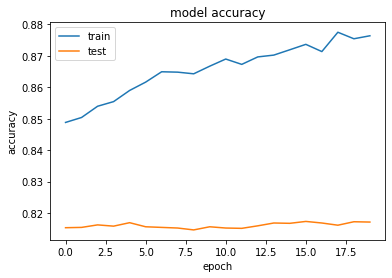

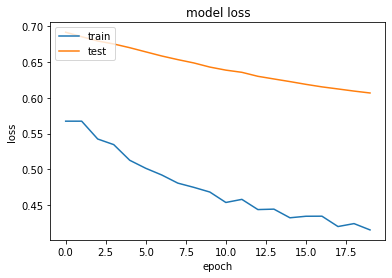

In [ ]:
import matplotlib.pyplot as plt
plt.plot(mm_history.history['accuracy'])
plt.plot(mm_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(mm_history.history['loss'])
plt.plot(mm_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## **2 Students**

In [ ]:
optd = Adam(lr=0.0002)
opt = Adam(lr=0.0001)

discriminator1 = build_sdiscriminator()
discriminator2 = build_sdiscriminator()
s1=define_model("s1")
s2=define_model("s2")

gan1 = build_gan(s1,discriminator1)
gan2 = build_gan(s2,discriminator2)
s1 = training(s1,discriminator1,gan1,s1Train,epo=90)
s2 = training(s2,discriminator2,gan2,s2Train,epo=98)

312/312 [==============================] - 35s 105ms/step
Epoch: 1 | Discriminator Loss: 1.721610 | Generator Loss: 2.085339 | 
312/312 [==============================] - 32s 104ms/step
Epoch: 2 | Discriminator Loss: 1.270868 | Generator Loss: 1.898533 | 
312/312 [==============================] - 32s 104ms/step
Epoch: 3 | Discriminator Loss: 1.150123 | Generator Loss: 1.700116 | 
312/312 [==============================] - 32s 102ms/step
Epoch: 4 | Discriminator Loss: 1.071535 | Generator Loss: 1.570838 | 
312/312 [==============================] - 31s 100ms/step
Epoch: 5 | Discriminator Loss: 1.033438 | Generator Loss: 1.504226 | 
312/312 [==============================] - 31s 101ms/step
Epoch: 6 | Discriminator Loss: 1.007410 | Generator Loss: 1.470378 | 
312/312 [==============================] - 33s 104ms/step
Epoch: 7 | Discriminator Loss: 0.990217 | Generator Loss: 1.444702 | 
312/312 [==============================] - 33s 105ms/step
Epoch: 8 | Discriminator Loss: 0.973856 | Gene

In [ ]:
o1=s1.get_layer("reqs1").output
o2=s2.get_layer("reqs2").output
output=tensorflow.keras.layers.concatenate([o1,o2])

output=Activation('relu')(output)
output2=Dropout(0.5)(output) # For reguralization
output3=Dense(10,activation="softmax", name="d1")(output2)

mm2=Model([s1.get_layer("s1").input,s2.get_layer("s2").input], output3)
my_weights=teacher.get_layer('dense_2').get_weights()
mm2.get_layer('d1').set_weights(my_weights)

In [ ]:
i=0
for l in mm1.layers[:len(mm1.layers)-2]:
    l.trainable=False
#     print(l)

In [ ]:
mm2.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0002),
              metrics=['accuracy'])

In [ ]:
# Without finetune
batch_size = 256
mm2_history=mm2.fit([X_train,X_train], Y_train,
          batch_size=batch_size,
          epochs=20,
          verbose=1,
          validation_data=([X_val,X_val], Y_val))

Epoch 1/20
157/157 [==============================] - 7s 41ms/step - loss: 6.7863 - accuracy: 0.1538 - val_loss: 1.5426 - val_accuracy: 0.4709
Epoch 2/20
157/157 [==============================] - 6s 38ms/step - loss: 3.4946 - accuracy: 0.2587 - val_loss: 1.0291 - val_accuracy: 0.6581
Epoch 3/20
157/157 [==============================] - 6s 38ms/step - loss: 2.4642 - accuracy: 0.3928 - val_loss: 0.7782 - val_accuracy: 0.7586
Epoch 4/20
157/157 [==============================] - 6s 38ms/step - loss: 1.7563 - accuracy: 0.5479 - val_loss: 0.7103 - val_accuracy: 0.7918
Epoch 5/20
157/157 [==============================] - 6s 37ms/step - loss: 1.3238 - accuracy: 0.6563 - val_loss: 0.6853 - val_accuracy: 0.8058
Epoch 6/20
157/157 [==============================] - 6s 37ms/step - loss: 1.0844 - accuracy: 0.7187 - val_loss: 0.6877 - val_accuracy: 0.8131
Epoch 7/20
157/157 [==============================] - 6s 37ms/step - loss: 0.9413 - accuracy: 0.7565 - val_loss: 0.6834 - val_accuracy: 0.8173

In [ ]:
l,a = mm2.evaluate([X_test,X_test], y_test)
l, a

313/313 [==============================] - 1s 3ms/step - loss: 0.6564 - accuracy: 0.8250


(0.656421422958374, 0.824999988079071)

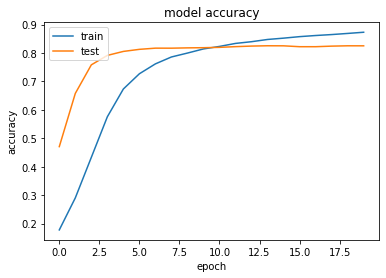

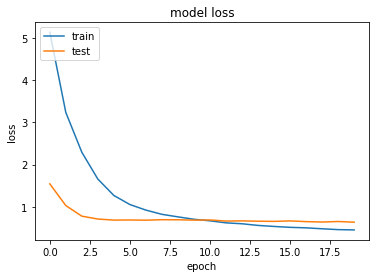

In [ ]:
import matplotlib.pyplot as plt
plt.plot(mm2_history.history['accuracy'])
plt.plot(mm2_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(mm2_history.history['loss'])
plt.plot(mm2_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
o1=s1.get_layer("reqs1").output
o2=s2.get_layer("reqs2").output
output=tensorflow.keras.layers.concatenate([o1,o2])

output=Activation('relu')(output)
output2=Dropout(0.5)(output) # For reguralization
output3=Dense(10,activation="softmax", name="d1")(output2)

mm22=Model([s1.get_layer("s1").input,s2.get_layer("s2").input], output3)
my_weights=teacher.get_layer('dense_2').get_weights()
mm22.get_layer('d1').set_weights(my_weights)

i=0
for l in mm22.layers[:len(mm22.layers)-2]:
    l.trainable=False
#     print(l)

# With finetune
batch_size = 256
mm22_history=mm22.fit([X_train,X_train], Y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=([X_val,X_val], Y_val))

RuntimeError: ignored

In [ ]:
l,a = mm22.evaluate([X_test,X_test], y_test)
l, a

In [ ]:
import matplotlib.pyplot as plt
plt.plot(mm22_history.history['accuracy'])
plt.plot(mm22_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(mm22_history.history['loss'])
plt.plot(mm22_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# TCN

## 1 Student

In [ ]:
s1 = define_model('s1')


In [ ]:
history1=s1.fit(X_train,s1Train,
          batch_size=256,
          epochs=50,
          verbose=1,
          validation_data=(X_val,s1Val))

Epoch 1/50
157/157 [==============================] - 6s 29ms/step - loss: 1.6353 - accuracy: 0.0023 - val_loss: 1.6285 - val_accuracy: 0.0252
Epoch 2/50
157/157 [==============================] - 4s 27ms/step - loss: 1.5201 - accuracy: 0.0628 - val_loss: 1.5394 - val_accuracy: 0.1115
Epoch 3/50
157/157 [==============================] - 4s 27ms/step - loss: 1.4852 - accuracy: 0.1268 - val_loss: 1.4893 - val_accuracy: 0.1277
Epoch 4/50
157/157 [==============================] - 4s 27ms/step - loss: 1.4500 - accuracy: 0.1403 - val_loss: 1.4284 - val_accuracy: 0.1380
Epoch 5/50
157/157 [==============================] - 4s 27ms/step - loss: 1.4113 - accuracy: 0.1404 - val_loss: 1.4023 - val_accuracy: 0.1422
Epoch 6/50
157/157 [==============================] - 4s 27ms/step - loss: 1.3917 - accuracy: 0.1400 - val_loss: 1.4059 - val_accuracy: 0.1441
Epoch 7/50
157/157 [==============================] - 4s 27ms/step - loss: 1.3786 - accuracy: 0.1554 - val_loss: 1.3812 - val_accuracy: 0.1492

In [ ]:
o1=student1.get_layer("reqs1").output

output=Activation('relu')(o1)
output2=Dropout(0.5)(output)
output3=Dense(10,activation="softmax", name="d1")(output2)
mm1=Model(student1.get_layer('s1').input, output3)
my_weights=teacher.get_layer('dense_2').get_weights()

# multi_model.summary()


In [ ]:
mm1.get_layer('d1').set_weights(my_weights)

In [ ]:
i=0
for l in mm1.layers[:18]:
  l.trainable=False
  #print (l.name)
  #print (i)
  #i=i+1

In [ ]:
mm1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
batch_size = 256
mm_history=mm1.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=20,
          verbose=1,
          validation_data=(X_val, Y_val))

Epoch 1/20
157/157 [==============================] - 3s 15ms/step - loss: 0.2709 - accuracy: 0.9223 - val_loss: 0.7129 - val_accuracy: 0.8175
Epoch 2/20
157/157 [==============================] - 2s 12ms/step - loss: 0.2202 - accuracy: 0.9305 - val_loss: 0.6951 - val_accuracy: 0.8181
Epoch 3/20
157/157 [==============================] - 2s 12ms/step - loss: 0.2107 - accuracy: 0.9330 - val_loss: 0.7046 - val_accuracy: 0.8197
Epoch 4/20
157/157 [==============================] - 2s 12ms/step - loss: 0.2076 - accuracy: 0.9341 - val_loss: 0.6963 - val_accuracy: 0.8195
Epoch 5/20
157/157 [==============================] - 2s 12ms/step - loss: 0.2030 - accuracy: 0.9348 - val_loss: 0.7047 - val_accuracy: 0.8186
Epoch 6/20
157/157 [==============================] - 2s 12ms/step - loss: 0.1970 - accuracy: 0.9368 - val_loss: 0.6904 - val_accuracy: 0.8184
Epoch 7/20
157/157 [==============================] - 2s 12ms/step - loss: 0.1886 - accuracy: 0.9406 - val_loss: 0.6991 - val_accuracy: 0.8192

In [ ]:
l,a = mm1.evaluate(X_test, y_test)
l, a

313/313 [==============================] - 1s 3ms/step - loss: 0.7170 - accuracy: 0.8178


(0.7169958353042603, 0.817799985408783)

## 2 student

In [ ]:
s2 = define_model('s2')
s1 = define_model('s1')

In [ ]:
history1=s1.fit(X_train,s1Train,
          batch_size=256,
          epochs=50,
          verbose=1,
          validation_data=(X_val,s1Val))

history2=s2.fit(X_train,s2Train,
          batch_size=256,
          epochs=50,
          verbose=1,
          validation_data=(X_val,s2Val))

Epoch 1/50
157/157 [==============================] - 5s 29ms/step - loss: 1.3712 - accuracy: 0.1065 - val_loss: 1.3905 - val_accuracy: 0.1021
Epoch 2/50
157/157 [==============================] - 4s 28ms/step - loss: 1.3540 - accuracy: 0.1111 - val_loss: 1.3487 - val_accuracy: 0.1162
Epoch 3/50
157/157 [==============================] - 4s 28ms/step - loss: 1.3390 - accuracy: 0.1295 - val_loss: 1.3456 - val_accuracy: 0.1153
Epoch 4/50
157/157 [==============================] - 4s 28ms/step - loss: 1.3258 - accuracy: 0.1427 - val_loss: 1.3357 - val_accuracy: 0.1454
Epoch 5/50
157/157 [==============================] - 4s 28ms/step - loss: 1.3010 - accuracy: 0.1544 - val_loss: 1.2977 - val_accuracy: 0.1653
Epoch 6/50
157/157 [==============================] - 4s 28ms/step - loss: 1.2807 - accuracy: 0.1609 - val_loss: 1.2799 - val_accuracy: 0.1638
Epoch 7/50
157/157 [==============================] - 5s 30ms/step - loss: 1.2693 - accuracy: 0.1636 - val_loss: 1.2750 - val_accuracy: 0.1512

In [ ]:
o1=s1.get_layer("reqs1").output
o2=s2.get_layer("reqs2").output
output=tensorflow.keras.layers.concatenate([o1,o2])

output=Activation('relu')(output)
output2=Dropout(0.5)(output)
output3=Dense(10,activation="softmax", name="d1")(output2)
mm2=Model([s1.get_layer('s1').input, s2.get_layer('s2').input], output3)
my_weights=teacher.get_layer('dense_2').get_weights()

# multi_model.summary()


In [ ]:
mm2.get_layer('d1').set_weights(my_weights)

In [ ]:
i=0
for l in mm2.layers[:18]:
  l.trainable=False
  #print (l.name)
  #print (i)
  #i=i+1

In [ ]:
mm2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
epochs = 10
batch_size = 256
mm2_history=mm2.fit([X_train,X_train], Y_train,
          batch_size=batch_size,
          epochs=20,
          verbose=1,
          validation_data=([X_val,X_val], Y_val))

Epoch 1/20
157/157 [==============================] - 5s 34ms/step - loss: 0.0925 - accuracy: 0.9700 - val_loss: 0.7880 - val_accuracy: 0.8315
Epoch 2/20
157/157 [==============================] - 5s 31ms/step - loss: 0.0904 - accuracy: 0.9699 - val_loss: 0.7829 - val_accuracy: 0.8344
Epoch 3/20
157/157 [==============================] - 5s 31ms/step - loss: 0.0891 - accuracy: 0.9713 - val_loss: 0.7887 - val_accuracy: 0.8334
Epoch 4/20
157/157 [==============================] - 5s 31ms/step - loss: 0.0878 - accuracy: 0.9714 - val_loss: 0.8102 - val_accuracy: 0.8322
Epoch 5/20
157/157 [==============================] - 5s 31ms/step - loss: 0.0862 - accuracy: 0.9708 - val_loss: 0.7784 - val_accuracy: 0.8355
Epoch 6/20
157/157 [==============================] - 5s 31ms/step - loss: 0.0883 - accuracy: 0.9706 - val_loss: 0.7793 - val_accuracy: 0.8354
Epoch 7/20
157/157 [==============================] - 5s 31ms/step - loss: 0.0864 - accuracy: 0.9709 - val_loss: 0.8122 - val_accuracy: 0.8311

In [ ]:
l,a = mm2.evaluate([X_test,X_test], y_test)
l, a

313/313 [==============================] - 1s 4ms/step - loss: 0.9161 - accuracy: 0.8204


(0.916100263595581, 0.8203999996185303)

## 4 students

In [ ]:
s2 = define_model('s2')
s1 = define_model('s1')
s3 = define_model('s3')
s4 = define_model('s4')

In [ ]:
history1=s1.fit(X_train,s1Train,
          batch_size=256,
          epochs=50,
          verbose=1,
          validation_data=(X_val,s1Val))

history2=s2.fit(X_train,s2Train,
          batch_size=256,
          epochs=50,
          verbose=1,
          validation_data=(X_val,s2Val))

Epoch 1/50
157/157 [==============================] - 6s 31ms/step - loss: 1.7302 - accuracy: 0.0964 - val_loss: 1.7280 - val_accuracy: 0.0930
Epoch 2/50
157/157 [==============================] - 4s 26ms/step - loss: 1.6549 - accuracy: 0.1486 - val_loss: 1.6258 - val_accuracy: 0.1481
Epoch 3/50
157/157 [==============================] - 4s 26ms/step - loss: 1.6119 - accuracy: 0.1461 - val_loss: 1.5905 - val_accuracy: 0.1476
Epoch 4/50
157/157 [==============================] - 4s 26ms/step - loss: 1.5838 - accuracy: 0.1467 - val_loss: 1.5690 - val_accuracy: 0.1465
Epoch 5/50
157/157 [==============================] - 4s 26ms/step - loss: 1.5637 - accuracy: 0.1486 - val_loss: 1.5552 - val_accuracy: 0.1462
Epoch 6/50
157/157 [==============================] - 4s 26ms/step - loss: 1.5584 - accuracy: 0.1469 - val_loss: 1.5466 - val_accuracy: 0.1462
Epoch 7/50
157/157 [==============================] - 4s 26ms/step - loss: 1.5422 - accuracy: 0.1457 - val_loss: 1.5414 - val_accuracy: 0.1462

In [ ]:
history3 = s3.fit(X_train,s3Train,
          batch_size=256,
          epochs=50,
          verbose=1,
          validation_data=(X_val,s3Val))

history4=s4.fit(X_train,s4Train,
          batch_size=256,
          epochs=50,
          verbose=1,
          validation_data=(X_val,s4Val))

Epoch 1/50
157/157 [==============================] - 5s 28ms/step - loss: 1.4794 - accuracy: 0.0778 - val_loss: 1.5467 - val_accuracy: 0.0900
Epoch 2/50
157/157 [==============================] - 4s 27ms/step - loss: 1.2718 - accuracy: 0.2064 - val_loss: 1.3213 - val_accuracy: 0.2275
Epoch 3/50
157/157 [==============================] - 4s 26ms/step - loss: 1.1944 - accuracy: 0.2480 - val_loss: 1.2068 - val_accuracy: 0.3406
Epoch 4/50
157/157 [==============================] - 4s 27ms/step - loss: 1.1463 - accuracy: 0.2772 - val_loss: 1.1500 - val_accuracy: 0.3217
Epoch 5/50
157/157 [==============================] - 4s 27ms/step - loss: 1.1235 - accuracy: 0.3018 - val_loss: 1.1151 - val_accuracy: 0.3207
Epoch 6/50
157/157 [==============================] - 4s 26ms/step - loss: 1.1039 - accuracy: 0.3128 - val_loss: 1.1109 - val_accuracy: 0.3246
Epoch 7/50
157/157 [==============================] - 4s 27ms/step - loss: 1.0895 - accuracy: 0.3177 - val_loss: 1.0868 - val_accuracy: 0.3221

In [ ]:
o1=s1.get_layer("reqs1").output
o2=s2.get_layer("reqs2").output
o3=s3.get_layer("reqs3").output
o4=s4.get_layer("reqs4").output
output=tensorflow.keras.layers.concatenate([o1,o2,o3,o4])

output=Activation('relu')(output)
output2=Dropout(0.5)(output)
output3=Dense(10,activation="softmax", name="d1")(output2)
mm2=Model([s1.get_layer('s1').input, 
           s2.get_layer('s2').input,
           s3.get_layer('s3').input,
           s4.get_layer('s4').input], output3)
my_weights=teacher.get_layer('dense_2').get_weights()

# multi_model.summary()


In [ ]:
mm2.get_layer('d1').set_weights(my_weights)

In [ ]:
i=0
for l in mm2.layers[:len(mm2.layers)-1]:
    l.trainable=False

In [ ]:
mm2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
epochs = 10
batch_size = 256
mm2_history=mm2.fit([X_train,X_train,X_train,X_train], Y_train,
          batch_size=batch_size,
          epochs=5,
          verbose=1,
          validation_data=([X_val,X_val,X_val,X_val], Y_val))

Epoch 1/5
157/157 [==============================] - 9s 48ms/step - loss: 0.7834 - accuracy: 0.7983 - val_loss: 0.5761 - val_accuracy: 0.8477
Epoch 2/5
157/157 [==============================] - 6s 41ms/step - loss: 0.3492 - accuracy: 0.9070 - val_loss: 0.5813 - val_accuracy: 0.8484
Epoch 3/5
157/157 [==============================] - 6s 41ms/step - loss: 0.3248 - accuracy: 0.9135 - val_loss: 0.5656 - val_accuracy: 0.8507
Epoch 4/5
157/157 [==============================] - 6s 41ms/step - loss: 0.3056 - accuracy: 0.9195 - val_loss: 0.5548 - val_accuracy: 0.8503
Epoch 5/5
157/157 [==============================] - 6s 41ms/step - loss: 0.2868 - accuracy: 0.9235 - val_loss: 0.5435 - val_accuracy: 0.8510


In [ ]:
mm2_history=mm2.fit([X_train,X_train,X_train,X_train], Y_train,
          batch_size=batch_size,
          epochs=5,
          verbose=1,
          validation_data=([X_val,X_val,X_val,X_val], Y_val))

Epoch 1/5
157/157 [==============================] - 8s 49ms/step - loss: 0.2699 - accuracy: 0.9272 - val_loss: 0.5343 - val_accuracy: 0.8506
Epoch 2/5
157/157 [==============================] - 6s 41ms/step - loss: 0.2713 - accuracy: 0.9263 - val_loss: 0.5247 - val_accuracy: 0.8504
Epoch 3/5
157/157 [==============================] - 6s 41ms/step - loss: 0.2663 - accuracy: 0.9270 - val_loss: 0.5160 - val_accuracy: 0.8504
Epoch 4/5
157/157 [==============================] - 6s 41ms/step - loss: 0.2604 - accuracy: 0.9270 - val_loss: 0.5133 - val_accuracy: 0.8498
Epoch 5/5
157/157 [==============================] - 7s 42ms/step - loss: 0.2582 - accuracy: 0.9284 - val_loss: 0.5065 - val_accuracy: 0.8509


In [ ]:
l,a = mm2.evaluate([X_test,X_test,X_test,X_test], y_test)
l, a

313/313 [==============================] - 2s 6ms/step - loss: 0.5463 - accuracy: 0.8420


(0.5462550520896912, 0.8420000076293945)